<a href="https://colab.research.google.com/github/manikanta-thomurothu/Face_mask_detection/blob/master/face_mask_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1_W2gFFZmy6ZyC8TPlxB49eDFswdBsQqo',
                                    dest_path='content/face_mask_detection.zip',
                                    unzip=True)

Unzipping...Done.


In [2]:
import pandas as pd                                     # Data analysis and manipultion tool
import numpy as np                                      # Fundamental package for linear algebra and multidimensional arrays
import tensorflow as tf                                 # Deep Learning Tool
import os                                               # OS module in Python provides a way of using operating system dependent functionality
import cv2                                              # Library for image processing
from sklearn.model_selection import train_test_split    # For splitting the data into train and validation set

In [3]:
labels = pd.read_csv("/content/content/face_mask_detection/Training_set_face_mask.csv")   # loading the labels
labels.head()           # will display the first five rows in labels dataframe

,filename,label
0,Image_1.jpg,without_mask
1,Image_2.jpg,without_mask
2,Image_3.jpg,without_mask
3,Image_4.jpg,without_mask
4,Image_5.jpg,without_mask


In [4]:
labels.tail()            # will display the last five rows in labels dataframe

,filename,label
11259,Image_11260.jpg,with_mask
11260,Image_11261.jpg,with_mask
11261,Image_11262.jpg,with_mask
11262,Image_11263.jpg,with_mask
11263,Image_11264.jpg,with_mask


In [5]:
file_paths = [[fname, '/content/content/face_mask_detection/train/' + fname] for fname in labels['filename']]

In [6]:
# Confirm if number of images is same as number of labels given
if len(labels) == len(file_paths):
    print('Number of labels i.e. ', len(labels), 'matches the number of filenames i.e. ', len(file_paths))
else:
    print('Number of labels does not match the number of filenames')

Number of labels i.e.  11264 matches the number of filenames i.e.  11264


In [7]:
images = pd.DataFrame(file_paths, columns=['filename', 'filepaths'])
images.head()

,filename,filepaths
0,Image_1.jpg,/content/content/face_mask_detection/train/Ima...
1,Image_2.jpg,/content/content/face_mask_detection/train/Ima...
2,Image_3.jpg,/content/content/face_mask_detection/train/Ima...
3,Image_4.jpg,/content/content/face_mask_detection/train/Ima...
4,Image_5.jpg,/content/content/face_mask_detection/train/Ima...


In [8]:
file_paths

[['Image_1.jpg', '/content/content/face_mask_detection/train/Image_1.jpg'],
 ['Image_2.jpg', '/content/content/face_mask_detection/train/Image_2.jpg'],
 ['Image_3.jpg', '/content/content/face_mask_detection/train/Image_3.jpg'],
 ['Image_4.jpg', '/content/content/face_mask_detection/train/Image_4.jpg'],
 ['Image_5.jpg', '/content/content/face_mask_detection/train/Image_5.jpg'],
 ['Image_6.jpg', '/content/content/face_mask_detection/train/Image_6.jpg'],
 ['Image_7.jpg', '/content/content/face_mask_detection/train/Image_7.jpg'],
 ['Image_8.jpg', '/content/content/face_mask_detection/train/Image_8.jpg'],
 ['Image_9.jpg', '/content/content/face_mask_detection/train/Image_9.jpg'],
 ['Image_10.jpg', '/content/content/face_mask_detection/train/Image_10.jpg'],
 ['Image_11.jpg', '/content/content/face_mask_detection/train/Image_11.jpg'],
 ['Image_12.jpg', '/content/content/face_mask_detection/train/Image_12.jpg'],
 ['Image_13.jpg', '/content/content/face_mask_detection/train/Image_13.jpg'],
 ['I

In [9]:
train_data = pd.merge(images, labels, how = 'inner', on = 'filename')
train_data.head()

,filename,filepaths,label
0,Image_1.jpg,/content/content/face_mask_detection/train/Ima...,without_mask
1,Image_2.jpg,/content/content/face_mask_detection/train/Ima...,without_mask
2,Image_3.jpg,/content/content/face_mask_detection/train/Ima...,without_mask
3,Image_4.jpg,/content/content/face_mask_detection/train/Ima...,without_mask
4,Image_5.jpg,/content/content/face_mask_detection/train/Ima...,without_mask


In [10]:
import cv2
import random
import matplotlib.pyplot as plt

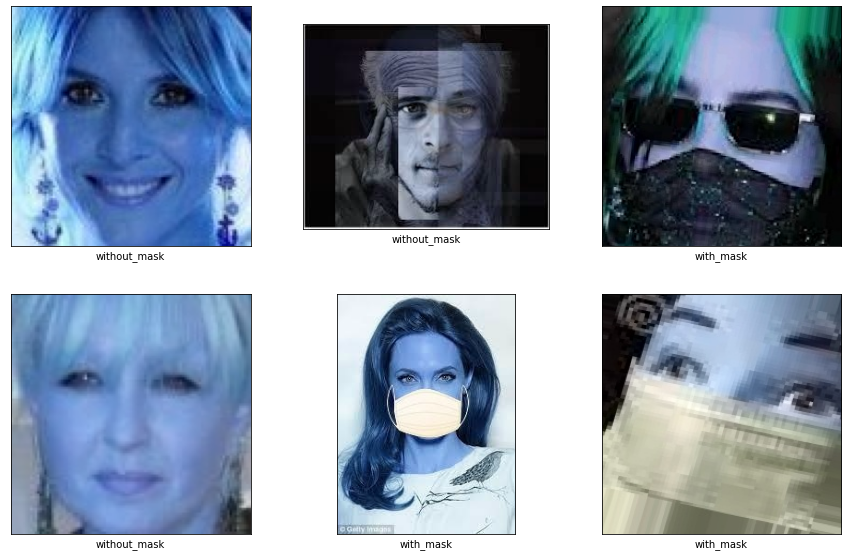

In [11]:

img = list(train_data.filepaths)
label = list(train_data.label)


plt.figure(figsize=(15,15))
for i in range(6):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  rand_no = random.randint(0,len(train_data)) 
  pic = cv2.imread(img[rand_no])    
  plt.imshow(pic)
  plt.xlabel(label[rand_no])

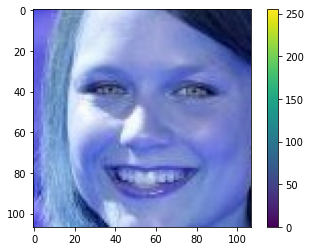

In [12]:
#check the range of pixel values
plt.figure()
pic = cv2.imread(img[0])
plt.imshow(pic)
plt.colorbar()
plt.grid(False)
plt.show()

In [13]:
pic = cv2.imread(img[0])
print("Image Properties")
print("- Number of Pixels: " + str(pic.size))
print("- Shape/Dimensions: " + str(pic.shape))

Image Properties
- Number of Pixels: 34347
- Shape/Dimensions: (107, 107, 3)


In [14]:
#Normalizing the pixel values and storing it
from tqdm import tqdm
from keras.preprocessing import image

train_image = []
for i in tqdm(range(train_data.shape[0])):
    img = image.load_img(train_data['filepaths'][i], target_size=(96,96,3), grayscale=False)
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)

100%|██████████| 11264/11264 [00:19<00:00, 591.17it/s]


In [15]:
X = np.array(train_image)
y = train_data['label'].values

In [16]:
from sklearn.preprocessing import LabelEncoder
y = np.array(y)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [17]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40, test_size=0.20)
y_train = y_train.reshape((-1,1))
y_test = y_test.reshape((-1,1))

In [19]:
import tensorflow as tf,keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
mobile_net = tf.keras.applications.MobileNetV2(input_shape=(96, 96, 3), include_top=False)

9412608/9406464 [==============================] - 0s 0us/step


In [21]:
# Build the CNN-model

cnn_model = keras.models.Sequential([
    mobile_net,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation = 'sigmoid')
])

In [22]:
hp = ImageDataGenerator(
	rotation_range=25,
	zoom_range=0.10,
	width_shift_range=0.25,
	height_shift_range=0.25,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

opt = keras.optimizers.Adam(learning_rate=0.0001)
cnn_model.compile(optimizer=opt, loss = 'binary_crossentropy', metrics = 'accuracy')

In [23]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_96 (Functio (None, 3, 3, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
flatten (Flatten)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               163968    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 2,422,081
Trainable params: 2,387,969
Non-trainable params: 34,112
_________________________________________

In [24]:
import datetime

EPOCHS = 100

es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4, 
                                               restore_best_weights=True,
                                               verbose=1)

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)


#history = cnn_model.fit(X_train, y_train,epochs=EPOCHS,callbacks=[tensorboard_callback,es_callback], validation_data=(X_test, y_test))
H = cnn_model.fit(
	hp.flow(X_train, y_train),
  callbacks=[tensorboard_callback,es_callback],
	validation_data=(X_test, y_test),
	epochs=EPOCHS)

Epoch 1/100
  1/282 [..............................] - ETA: 0s - loss: 0.8787 - accuracy: 0.5312WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
282/282 [==============================] - 367s 1s/step - loss: 0.1286 - accuracy: 0.9473 - val_loss: 0.2124 - val_accuracy: 0.9396
Epoch 2/100
282/282 [==============================] - 363s 1s/step - loss: 0.0375 - accuracy: 0.9876 - val_loss: 0.1430 - val_accuracy: 0.9649
Epoch 3/100
282/282 [==============================] - 363s 1s/step - loss: 0.0225 - accuracy: 0.9929 - val_loss: 0.0216 - val_accuracy: 0.9960
Epoch 4/100
282/282 [==============================] - 362s 1s/step - loss: 0.0153 - accuracy: 0.9946 - val_loss: 0.0149 - val_accuracy: 0.9951
Epoch 5/100
282/282 [==============================] - 359s 1s

In [25]:
test_loss, test_acc = cnn_model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

71/71 - 14s - loss: 0.0061 - accuracy: 0.9978

Test accuracy: 0.9977807402610779


In [26]:
# Loading the order of the image's name that has been provided
test_image_order = pd.read_csv("/content/content/face_mask_detection/Testing_set_face_mask.csv")
test_image_order.head()

,filename,label
0,Image_1.jpg,NaN
1,Image_2.jpg,NaN
2,Image_3.jpg,NaN
3,Image_4.jpg,NaN
4,Image_5.jpg,NaN


In [27]:
file_paths = [[fname, '/content/content/face_mask_detection/test/' + fname] for fname in test_image_order['filename']]

In [28]:
# Confirm if number of images is same as number of labels given
if len(test_image_order) == len(file_paths):
    print('Number of image names i.e. ', len(test_image_order), 'matches the number of file paths i.e. ', len(file_paths))
else:
    print('Number of image names does not match the number of filepaths')

Number of image names i.e.  1536 matches the number of file paths i.e.  1536


In [29]:
test_images = pd.DataFrame(file_paths, columns=['filename', 'filepaths'])
test_images.head()

,filename,filepaths
0,Image_1.jpg,/content/content/face_mask_detection/test/Imag...
1,Image_2.jpg,/content/content/face_mask_detection/test/Imag...
2,Image_3.jpg,/content/content/face_mask_detection/test/Imag...
3,Image_4.jpg,/content/content/face_mask_detection/test/Imag...
4,Image_5.jpg,/content/content/face_mask_detection/test/Imag...


In [30]:
test_data = pd.merge(test_images, test_image_order, how = 'inner', on = 'filename')
test_data.head()

,filename,filepaths,label
0,Image_1.jpg,/content/content/face_mask_detection/test/Imag...,NaN
1,Image_2.jpg,/content/content/face_mask_detection/test/Imag...,NaN
2,Image_3.jpg,/content/content/face_mask_detection/test/Imag...,NaN
3,Image_4.jpg,/content/content/face_mask_detection/test/Imag...,NaN
4,Image_5.jpg,/content/content/face_mask_detection/test/Imag...,NaN


In [31]:
test_data.drop('label', axis = 1, inplace=True)

In [32]:
test_image = []
for i in tqdm(range(test_data.shape[0])):
    img = image.load_img(test_data['filepaths'][i], target_size=(96,96,3), grayscale=False)
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)
W = np.array(test_image)

100%|██████████| 1536/1536 [00:03<00:00, 487.90it/s]


In [33]:
pred = cnn_model.predict(W)

In [34]:
# The predicted values are the probabilities value
pred[0]

array([1.], dtype=float32)

In [36]:
prediction = []
for value in pred:
  if value < 0.5:
    prediction.append(0)      # it can be 0 or your respective class
  else:
    prediction.append(1)

In [37]:
Ans = []
for i in prediction:
  if i == 1:
    Ans.append('without_mask')
  else:
    Ans.append('with_mask')

In [38]:
res = pd.DataFrame({'filename': test_data['filename'], 'label': Ans})  # prediction is nothing but the final predictions of your model on input features of your new unseen test data
res.to_csv("submission.csv") 

# To download the csv file locally
from google.colab import files        
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>